In [1]:
# !pip install kagglehub

In [2]:
import kagglehub
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [3]:
# Importing necessary libraries
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Available!


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhupalreddy09","key":"83b7cb99c2a3e761bd380b34dfd3fa17"}'}

In [6]:
# Load and explore the datase
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [7]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)
# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


In [8]:
import os

print(os.listdir(path))

['the_wildfire_dataset_2n_version']


In [ ]:
import os
print(os.listdir())

['.config', 'kaggle (1).json', 'kaggle.json', 'sample_data']


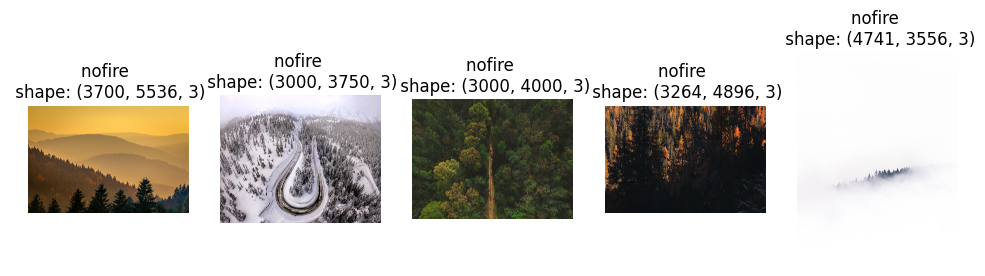

In [9]:
# Get the class names (subfolders) from the training directory
classes = os.listdir(train_dir)

plt.figure(figsize=(12, 10))
for i in range(5):
  # Access the first class (you can change this to visualize other classes)
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

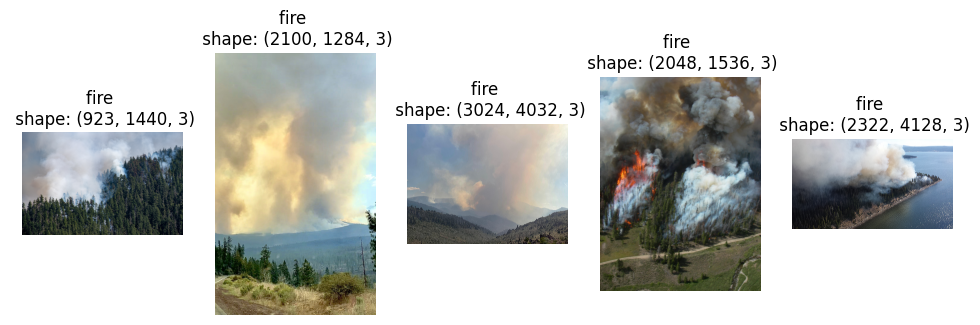

In [10]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [11]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [12]:
def create_model_1():
  """
   CNN model.
  """
  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
      MaxPooling2D(2, 2),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(512, activation='relu'),
      Dropout(0.5),  # Add dropout for regularization
      Dense(1, activation='sigmoid') # Binary classification (fire/no fire)
  ])
  return model

def create_model_2():
  """
  A slightly deeper CNN model with more filters.
  """
  model = Sequential([
      Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
      MaxPooling2D(2, 2),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(256, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(512, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(1024, activation='relu'),
      Dropout(0.5),
      Dense(1, activation='sigmoid')
  ])
  return model

def create_model_3():
  """
  A CNN model inspired by VGG16 architecture (simplified).
  """
  model = Sequential([
      Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_width, img_height, 3)),
      Conv2D(64, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(2, 2),
      Conv2D(128, (3, 3), activation='relu', padding='same'),
      Conv2D(128, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(2, 2),
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(4096, activation='relu'),
      Dropout(0.5),
      Dense(4096, activation='relu'),
      Dropout(0.5),
      Dense(1, activation='sigmoid')
  ])
  return model

# Choose and compile the model
model = create_model_1() # Or create_model_2() or create_model_3()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

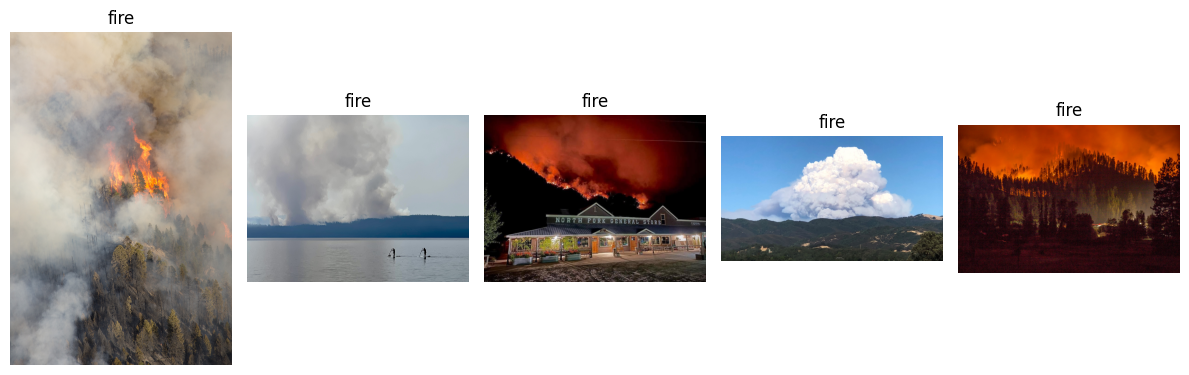

In [13]:
import random

classes = ['fire']  # List of classes

# Number of images to display per class
num_images_per_class = 5

# Create a figure and axes
plt.figure(figsize=(12, 10))

# Loop through each class
for class_index, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path) # Get the list of image files for the current class

    # Select random images from the class
    selected_images = random.sample(image_files, num_images_per_class)

    # Display images for the current class
    for image_index, image_file in enumerate(selected_images):
        image_path = os.path.join(class_path, image_file)
        img = plt.imread(image_path) # Load the image for each iteration

        # Correct the subplot index calculation
        plt.subplot(len(classes), num_images_per_class, class_index * num_images_per_class + image_index + 1)
        plt.imshow(img)
        plt.title(f'{class_name}')
        plt.axis('off')

plt.tight_layout()
plt.show()